In [94]:
import pandas as pd
import sys
import numpy as np
import random 
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from sklearn.cluster import KMeans
from sklearn import datasets

In [95]:
def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    i,a,b,lat1, lon1 = coord1
    i,a,b,lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [96]:
data=pd.read_csv("//home/emmanuel/Documents/ProgramasMaestria/Modelo/data/ubicaciones.csv")

In [97]:
data.head()

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon
0,1,A1,1,2.0,20.506052,-98.212377
1,2,A1,1,17.0,20.458128,-98.221248
2,3,A1,1,2.0,20.530427,-98.236860
3,4,A1,3,15.0,20.488655,-98.202940
4,5,A1,1,2.0,20.533253,-98.219669


In [5]:
X=data[['Id_Cliente',"Frecuencia","Vol_Entrega","lat","lon"]].to_numpy()
X=list(X)

In [6]:
climit=data.Frecuencia.sum()/6
vmax=data.Frecuencia*data.Vol_Entrega
vlim=vmax.sum()/6

In [7]:
#Matriz de Distancias
ntotal=len(X)
evalu=[]
for i in range(ntotal):
    ss=[]
    for j in range(ntotal):
        ss.append(0)
    evalu.append(ss)
for i in range(ntotal):
    for j in range(ntotal):
        if j>i:
            evalu[i][j]=haversine(X[i], X[j])
            evalu[j][i]=evalu[i][j]

In [98]:
def f(y,C):
    cliente1=[]
    cliente2=[]
    cliente3=[]
    cliente4=[]
    cliente5=[]
    cliente6=[]
    dist=0
    maximos=[]
    for i in range(len(y)):
        if y[i]==0:
            cliente1.append(i)
        if y[i]==1:
            cliente2.append(i)
        if y[i]==2:
            cliente3.append(i)
        if y[i]==3:
            cliente4.append(i)
        if y[i]==4:
            cliente5.append(i)
        if y[i]==5:
            cliente6.append(i)
    aux=[]
    for i in cliente1:
        aux.append(evalu[C[0]][i])
    maximos.append(max(aux))
    dist+=max(aux)
    aux=[]
    for i in cliente2:
        aux.append(evalu[C[1]][i])
    maximos.append(max(aux))
    dist+=max(aux)
    aux=[]
    for i in cliente3:
        aux.append(evalu[C[2]][i])
    maximos.append(max(aux))
    dist+=max(aux)
    aux=[]
    for i in cliente4:
        aux.append(evalu[C[3]][i])
    maximos.append(max(aux))
    dist+=max(aux)
    aux=[]
    for i in cliente5:
        aux.append(evalu[C[4]][i])
    maximos.append(max(aux))
    dist+=max(aux)
    aux=[]
    for i in cliente6:
        aux.append(evalu[C[5]][i])
    maximos.append(max(aux))
    dist+=max(aux)
    return dist,maximos 
def centros(X):
    C=[]
    aux=random.choice(X)
    while(aux[1]!=1):
        aux=random.choice(X)
    C.append(int(aux[0]))
    dist=evalu[int(C[0]-1)]
    aux=random.choice(dist)
    while(aux<=mean(dist)*0.7):
        aux=random.choice(dist)
    indx=dist.index(aux)
    C.append(int(X[indx][0]))
    for i in range(4):
        dist=np.array(dist)
        dist+=np.array(evalu[int(C[i+1]-1)])
        dist=list(dist)
        aux=random.choice(dist)
        while(aux<=mean(dist)*0.9):
            aux=random.choice(dist)
        indx=dist.index(aux)
        C.append(int(X[indx][0]))    
    return C

def clientes(C,X,asig,frec):
    for i in range(6):
        dist=evalu[C[i]-1].copy()
        dist[C[i]-1]=1000000000
        asig[i][C[i]-1]=1
        frec[C[i]-1]-=1
        maxv=X[C[i]-1][2]
        j=1
        f=[]
        for k in range(len(frec)):
            if(frec[k]>1):
                f.append(dist[k])
        for k in range(len(f)):
            aux=min(f)
            ind=f.index(aux)
            indx=dist.index(aux)
            while(frec[indx]<1):
                dist[indx]=10000000000
                f[ind]=10000000000
                aux=min(f)
                indx=dist.index(aux)
                ind=f.index(aux)
            dist[indx]=1000000000
            f[ind]=10000000000
            asig[i][indx]=1
            frec[indx]-=1
            maxv+=X[indx][2]
            j=j+1
        while(sum(frec)>=1):
                aux=min(dist)
                indx=dist.index(aux)
                while(frec[indx]<1):
                    dist[indx]=10000000000
                    aux=min(dist)
                    indx=dist.index(aux)
                dist[indx]=1000000000
                asig[i][indx]=1
                frec[indx]-=1
                maxv+=X[indx][2]
                j=j+1
                if(maxv>=vlim*1.1):
                    break
                if(j>=climit*1.1):
                    break
        print(maxv,vlim,j,climit)

In [103]:
k=False
while( k==False):
    asig=[]
    for i in range(6):
        ss=[]
        for j in range(ntotal):
            ss.append(0)
        asig.append(ss)
    frec=list(np.array(data.Frecuencia))

    a=centros(X)

    print(a)

    clientes(a,X,asig,frec)
    j=0

    for i in frec:
        if(i==0):
            j+=1
    if(j==3625):
        k=True
        

[2037, 2372, 2390, 2537, 14, 2553]
9985.499999995998 9066.666666664665 630 662.8333333333334
9555.499999996 9066.666666664665 730 662.8333333333334
9918.333333333 9066.666666664665 730 662.8333333333334
9976.499999993 9066.666666664665 636 662.8333333333334
8656.0 9066.666666664665 730 662.8333333333334
6296.16666667 9066.666666664665 521 662.8333333333334
[3564, 996, 2536, 1654, 3361, 3363]
9975.499999996002 9066.666666664665 660 662.8333333333334
9987.999999996 9066.666666664665 705 662.8333333333334
9981.16666666 9066.666666664665 726 662.8333333333334
8769.000000003001 9066.666666664665 730 662.8333333333334
8927.5 9066.666666664665 730 662.8333333333334
6690.833333333 9066.666666664665 426 662.8333333333334
[2743, 2899, 329, 1178, 445, 2384]
9975.499999996 9066.666666664665 660 662.8333333333334
9978.499999996 9066.666666664665 728 662.8333333333334
8590.500000003001 9066.666666664665 730 662.8333333333334
9854.333333333 9066.666666664665 730 662.8333333333334
9976.0 9066.66666666

In [100]:
out=pd.DataFrame(asig)
out=out.T
out['C'] = np.arange(1,len(out)+1)
out.columns = ['D1','D2','D3','D4','D5','D6','Id_Cliente']
out=out[['Id_Cliente','D1','D2','D3','D4','D5','D6']]
out.to_csv('out.csv',index=False)

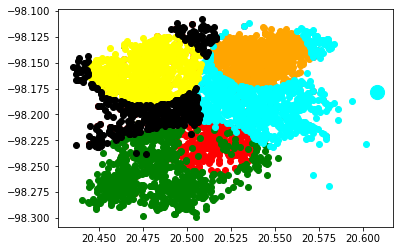

In [40]:
x=0
colores=['red','green','orange','cyan','yellow','black']
for i in range(len(a)):
    plt.scatter(data.lat[a[i]-1],data.lon[a[i]-1],c=colores[i],s=200)
    for j in range(len(asig[i])):
        if(asig[i][j]==1):
            plt.scatter(data.lat[j],data.lon[j],c=colores[i])

In [42]:
out=pd.DataFrame(asig)

In [43]:
out=out.T
out['C'] = np.arange(1,len(out)+1)
out.columns = ['D1','D2','D3','D4','D5','D6','Id_Cliente']
out=out[['Id_Cliente','D1','D2','D3','D4','D5','D6']]

In [44]:
out.to_csv('out.csv',index=False)

In [897]:
out['Frecuency']=data.Frecuencia

In [898]:
out=out.to_numpy()

In [548]:
z=[]
for i in range(len(out)):
    if(out[i][1]+out[i][2]+out[i][3]+out[i][4]+out[i][5]+out[i][6]!=out[i][7]):
        print(out[i][1]+out[i][2]+out[i][3]+out[i][4]+out[i][5]+out[i][6],out[i][7],i)
        z.append(i)

In [549]:
for i in z:
    print(out[i])